In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme()

# escolhe exemplares
NORMAL = '../mafaulda_reduced/normal_fft.csv'
DESBALANCEAMENTO = '../mafaulda_reduced/imbalance/35g_fft.csv'
DESALINHAMENTO_VERTICAL = '../mafaulda_reduced/vertical-misalignment/1.90mm_fft.csv'
DESALINHAMENTO_HORIZONTAL = '../mafaulda_reduced/horizontal-misalignment/1.5mm_fft.csv'

In [5]:
def plot_waterfall(file_path, axis='tg1', strides=5, n_harmonics=2):
    df = pd.read_csv(file_path)
    df_tg1 = df.pivot(index='freq_ax', columns='rotacao', values=axis)[0:(60*n_harmonics)]
    fig = plt.figure(figsize=[10*n_harmonics, 4*n_harmonics])
    ax = fig.add_subplot(111, projection = '3d')

    x = df_tg1.index.values    # frequências
    y = df_tg1.columns.values  # rotações
    xv, yv = np.meshgrid(x, y)

    z = df_tg1.values.T**2

    ax.set_xlabel("Frequência")
    ax.set_ylabel("Rotação")
    ax.set_zlabel(axis)
    
    for i in range(1, n_harmonics+1):
        ax.plot([10*i, 60*i], [10, 60], zs=0, zdir='z', color='black', linewidth=0.5)
    
    n_rotations = y.shape[0]
    for r in range(0, n_rotations, strides):
        ax.plot(xv[r,:], yv[r,:], z[r,:], linewidth=0.6*(1-0.8*r/n_rotations), color=[0.7*(r/n_rotations), 0.4*(1-r/n_rotations),0])

    plt.show()

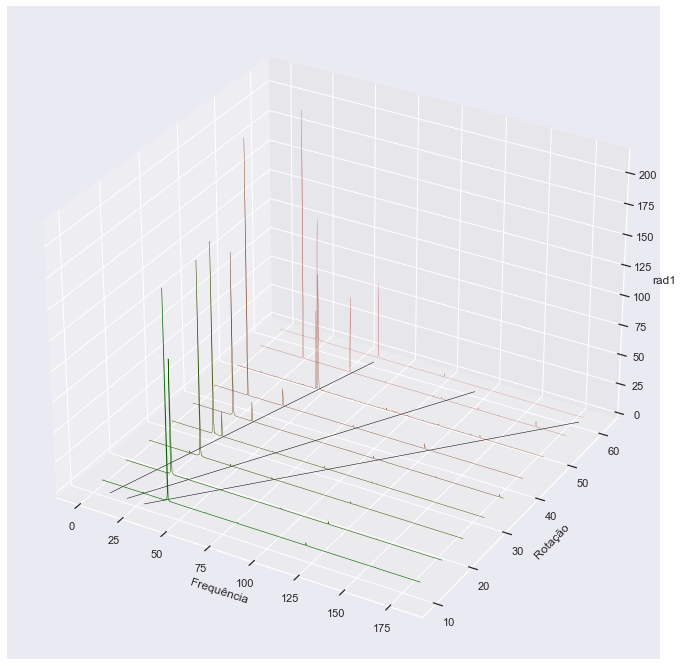

In [17]:
plot_waterfall(NORMAL, 'rad1', strides=6, n_harmonics=3)

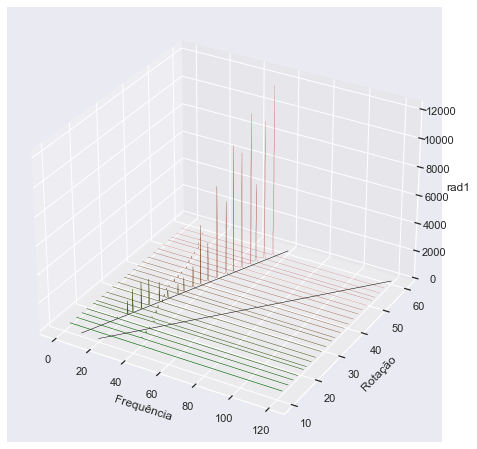

In [9]:
plot_waterfall(DESBALANCEAMENTO, 'rad1', strides=2, n_harmonics=2)

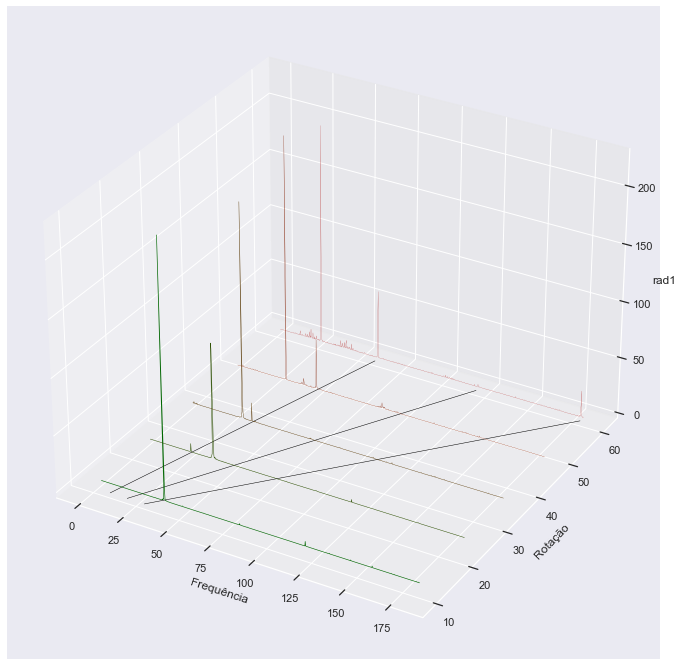

In [10]:
plot_waterfall(DESALINHAMENTO_VERTICAL, 'rad1', strides=12, n_harmonics=3)

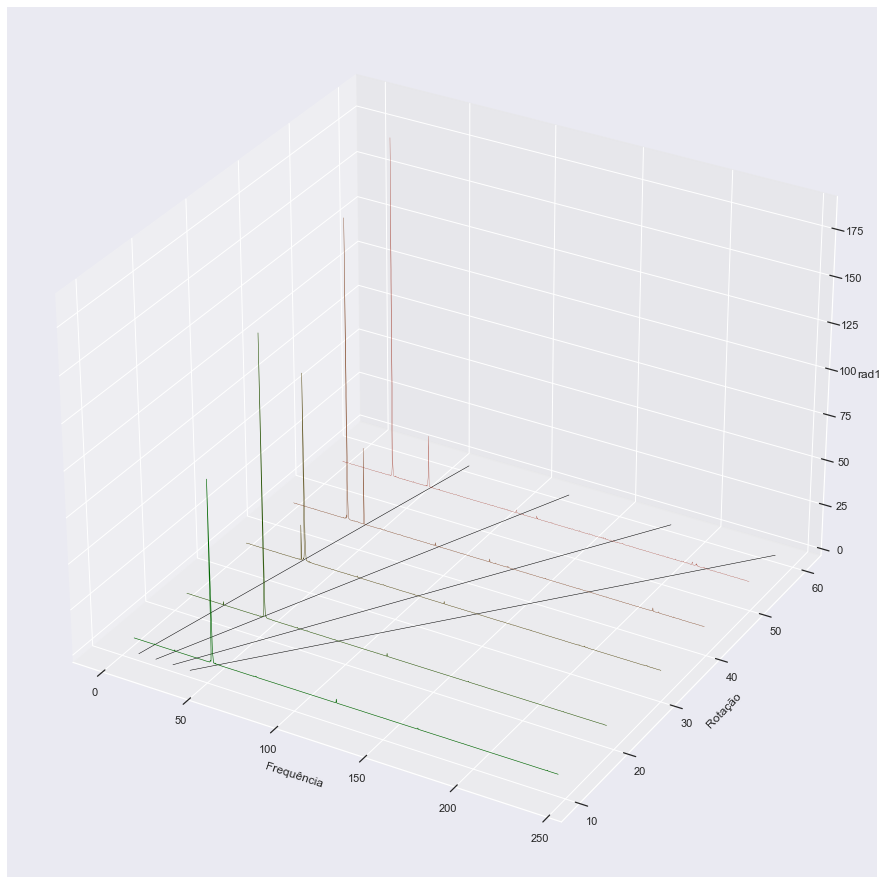

In [11]:
plot_waterfall(DESALINHAMENTO_HORIZONTAL, 'rad1', strides=10, n_harmonics=4)